# Bank Marketing - Market Segmentation
#### Project Type: Neural Networks Project

# Dataset Description
**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

#### Attribute Information:
**Bank client data:**

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**

Contact: contact communication type (categorical:'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

Day_of_week: last contact day of the week (categorical:'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not
previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') Social and economic context attributes

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

y - has the client subscribed a term deposit? (binary: 'yes', 'no')ibed a term deposit? (binary: 'yes', 'no').

# Importing Libraries

In [1]:
# Basic libs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
#Load the dataset
df = pd.read_csv('bank-additional-full.csv')

In [3]:
#Display the shape of dataset
df.shape

(41188, 21)

In [4]:
#Display the first 5 rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Observation**
- Data have numerical and categorical data
- There 21 Features
- 'y' is the output

According to dataset documentation, we need to drop the 'duration' column in real-case the duration is only known after the label column (y) is known. 

In [5]:
#Display the columns of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#Display the basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preparation
handling missing values, cleaning the data, and transforming it into a format suitable for analysis.

#### 1- Drop Unwanted columns

In [7]:
df.drop(['duration','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)

In [8]:
#Display top 5 rows of dataset after drop the unwanted columns
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,no


In [9]:
#Display the shape of dataset
df.shape

(41188, 15)

**Observation**
- There are 41188 rows and 15 columns

#### 2- Handling Missing Values


In [10]:
# check if there is a null values in the dataset
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

**No missing values found in this dataset**

#### 3- Find Duplicate Values

In [11]:
#Counts and prints the number of duplicate rows in the dataset.
duplicates_retail = df.duplicated()
print("Duplicate values in df are:", duplicates_retail.sum())

Duplicate values in df are: 2417


In [12]:
#Removes duplicate rows from the dataset and resets the index.
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [13]:
# checking if there is any duplicate rows in the dataset
duplicates_retail = df.duplicated()
print("Duplicate values in df are:", duplicates_retail.sum())

Duplicate values in df are: 0


**The dataset contains a total of 2417 duplicate rows. Duplicate rows could potentially skew analysis results and should be handled appropriately by removing them to ensure data integrity.**

In [14]:
#Display the shape of dataset
df.shape

(38771, 15)

# Exploratory data analysis


#### Show the numbers of unique values in each columns

In [15]:
for col in df.columns:
    print(f'The number of unique values in {col} column is: ',df[col].nunique())

The number of unique values in age column is:  78
The number of unique values in job column is:  12
The number of unique values in marital column is:  4
The number of unique values in education column is:  8
The number of unique values in default column is:  3
The number of unique values in housing column is:  3
The number of unique values in loan column is:  3
The number of unique values in contact column is:  2
The number of unique values in month column is:  10
The number of unique values in day_of_week column is:  5
The number of unique values in campaign column is:  42
The number of unique values in pdays column is:  27
The number of unique values in previous column is:  8
The number of unique values in poutcome column is:  3
The number of unique values in y column is:  2


#### Explore the Categorical Feature

In [16]:
for col in df.select_dtypes(include='object').columns:
    print(col, ' : ', df[col].unique())

job  :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital  :  ['married' 'single' 'divorced' 'unknown']
education  :  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default  :  ['no' 'unknown' 'yes']
housing  :  ['no' 'yes' 'unknown']
loan  :  ['no' 'yes' 'unknown']
contact  :  ['telephone' 'cellular']
month  :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week  :  ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome  :  ['nonexistent' 'failure' 'success']
y  :  ['no' 'yes']


In [17]:
cat_features = [feature for feature in df.columns if ((df[feature].dtypes=='O')&(feature not in ['y']))]
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [18]:
for feature in cat_features:
    print(f'The number of unique values in {feature} column is: ',df[feature].nunique())

The number of unique values in job column is:  12
The number of unique values in marital column is:  4
The number of unique values in education column is:  8
The number of unique values in default column is:  3
The number of unique values in housing column is:  3
The number of unique values in loan column is:  3
The number of unique values in contact column is:  2
The number of unique values in month column is:  10
The number of unique values in day_of_week column is:  5
The number of unique values in poutcome column is:  3


**Observation**
- There are 10 categorical features
- The job, education, and month columns have highest of categorical values


#### Find Categorical Featue Distribution

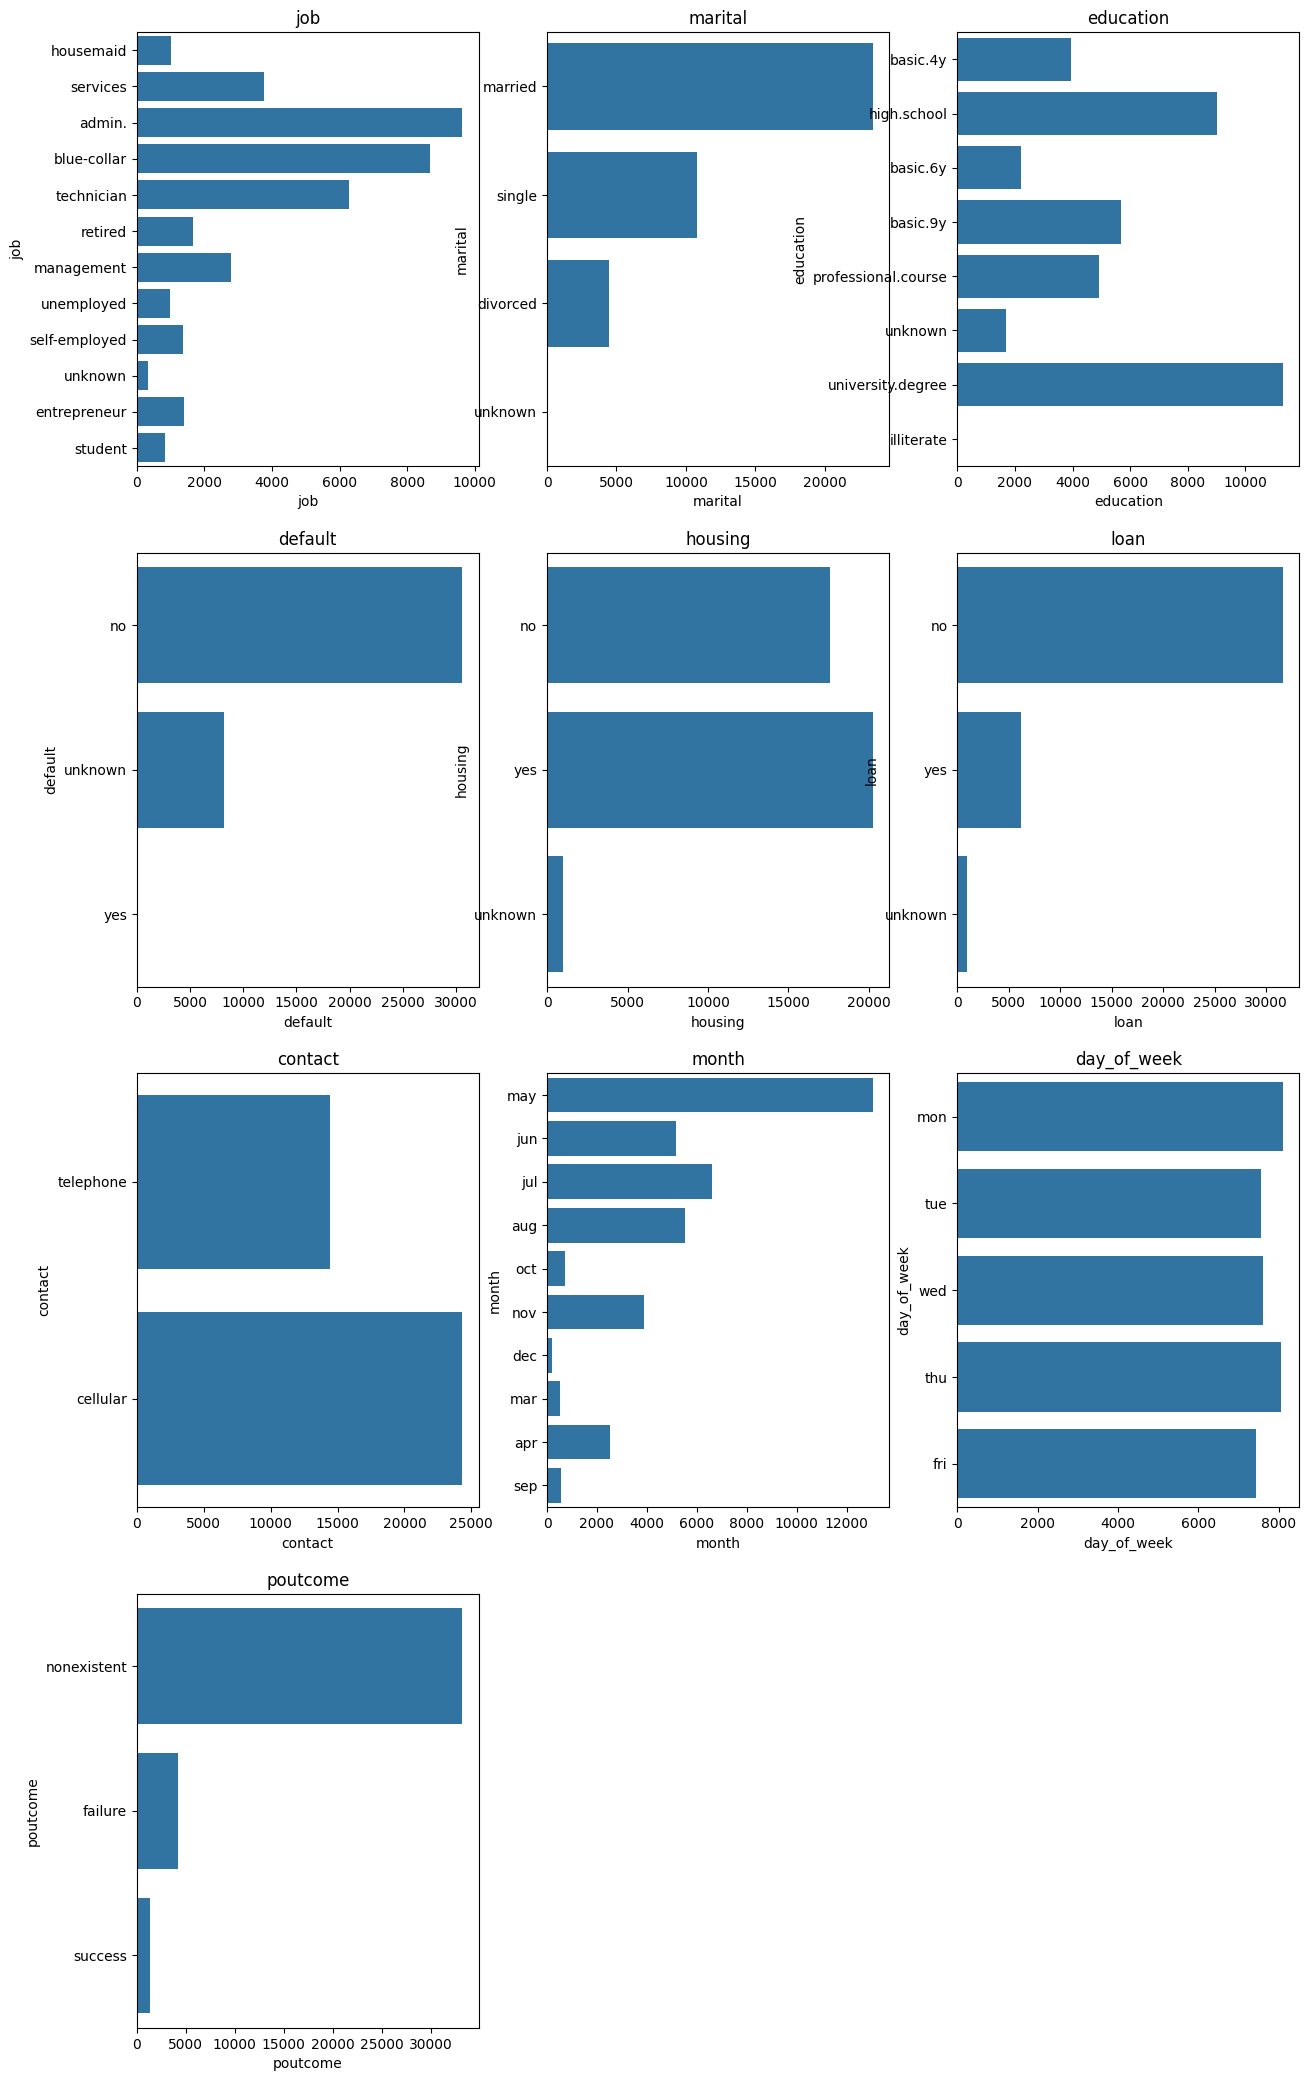

In [19]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Observation**
- The client with job type as admin records are high in given dataset and student are very less
- The client who married are high in records in given dataset and divorced are less
- The client whoes education background is university.degree are in high numbers in given dataset
- The defualt feature seems to be doesn't play importand role as it has value of no at high ratio to value yes which can drop
- The data in month of may is high and less in dec


#### Relationship between Categorical Features and Label

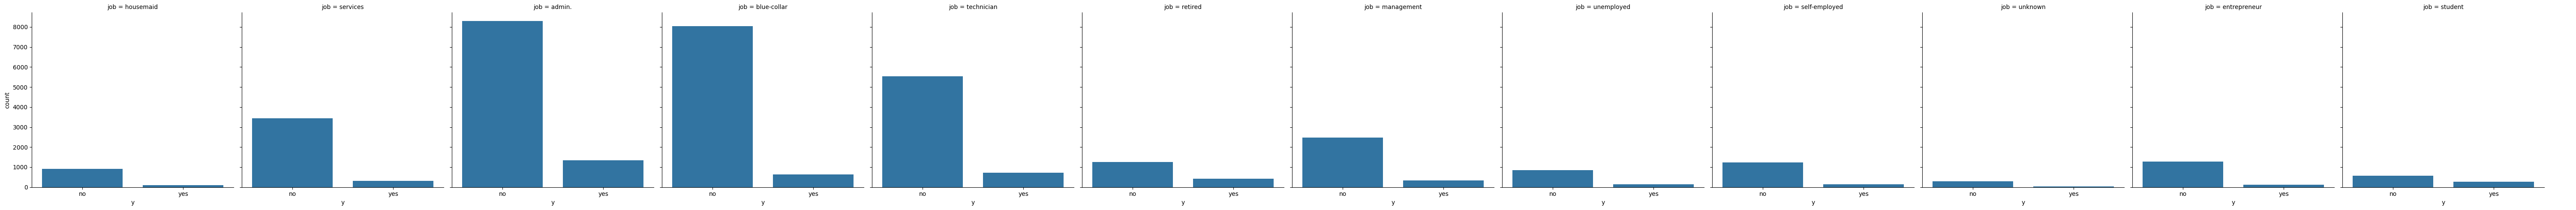

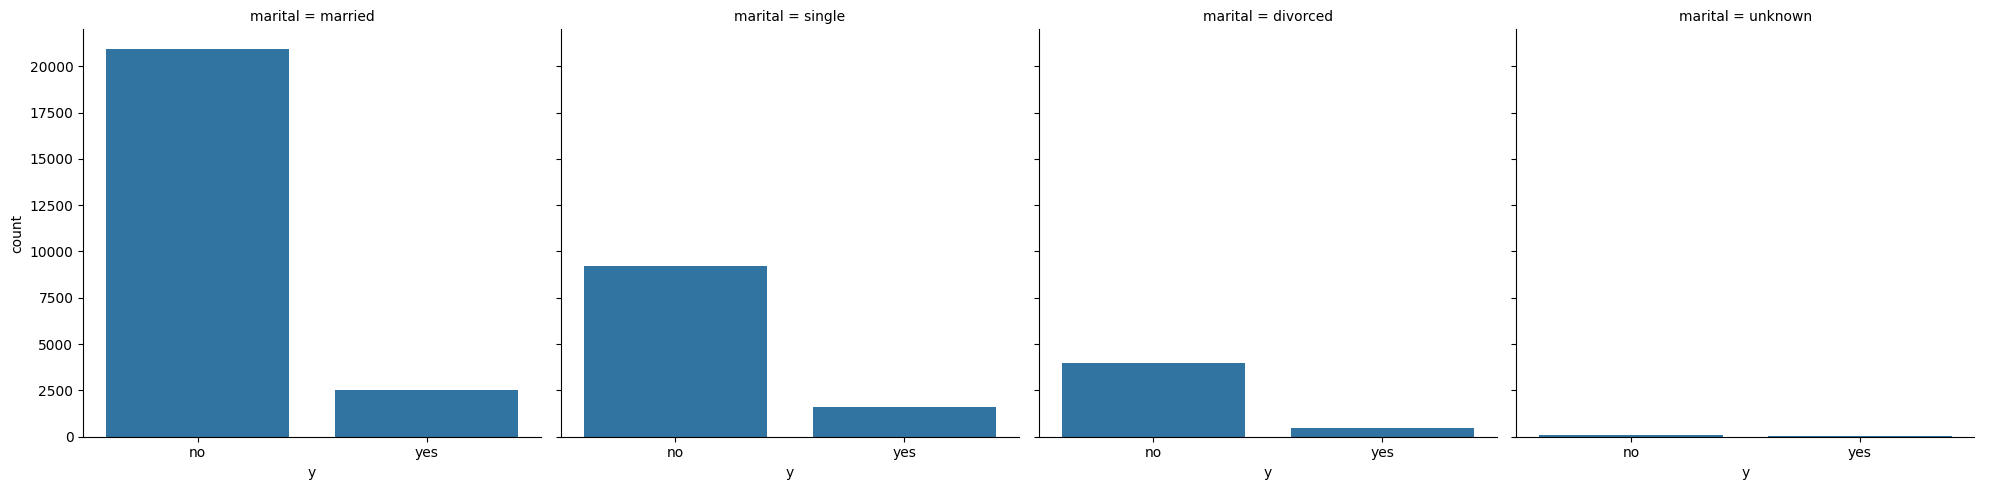

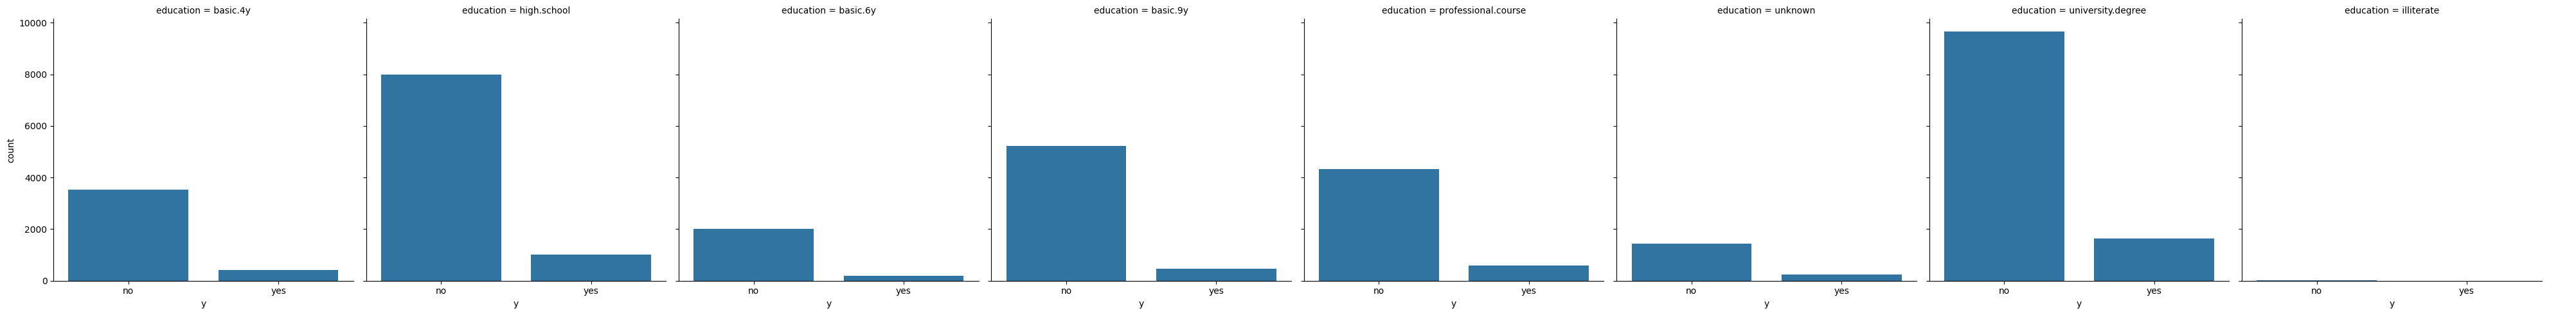

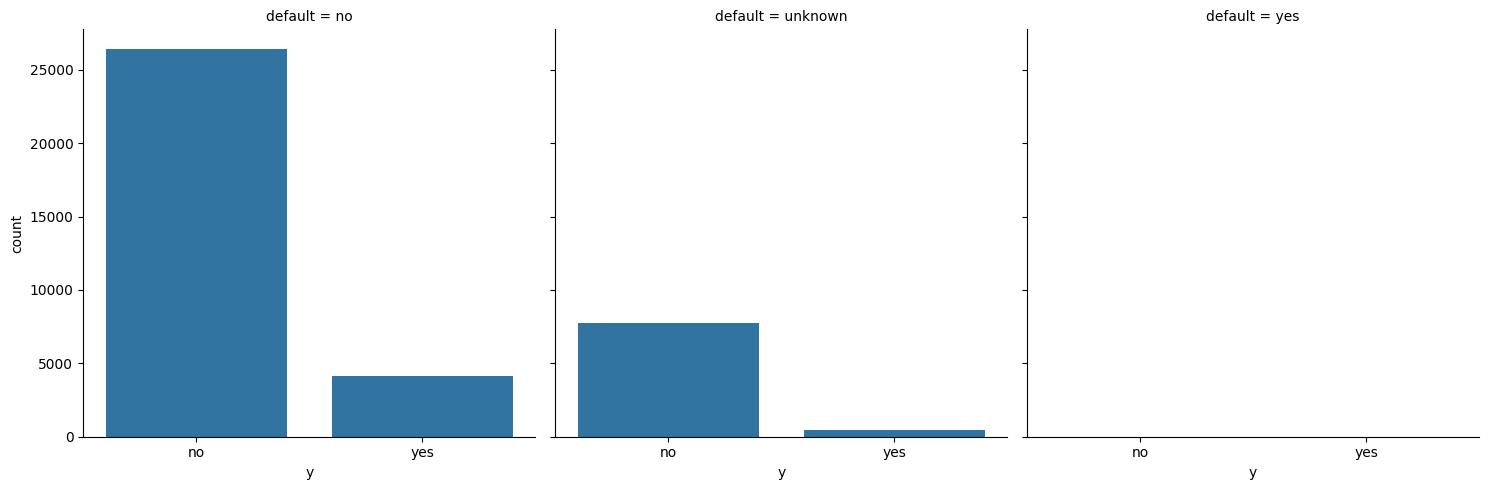

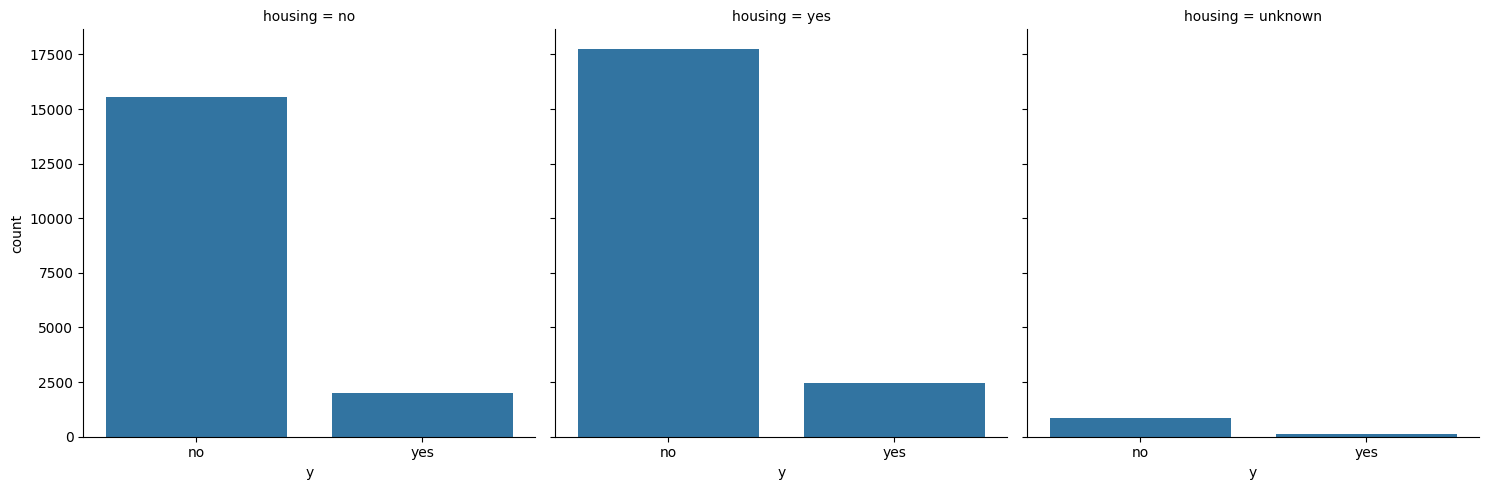

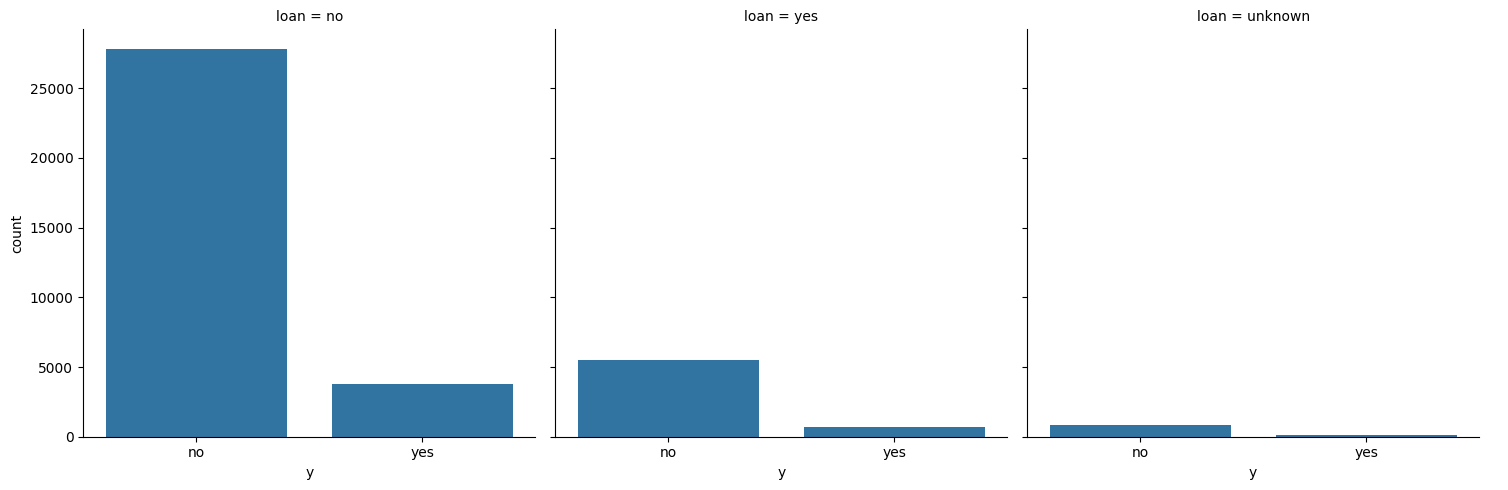

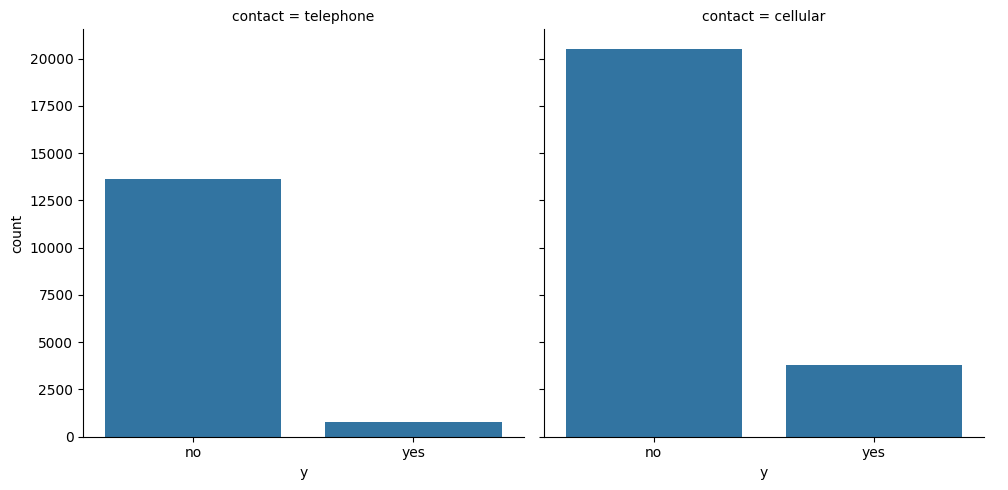

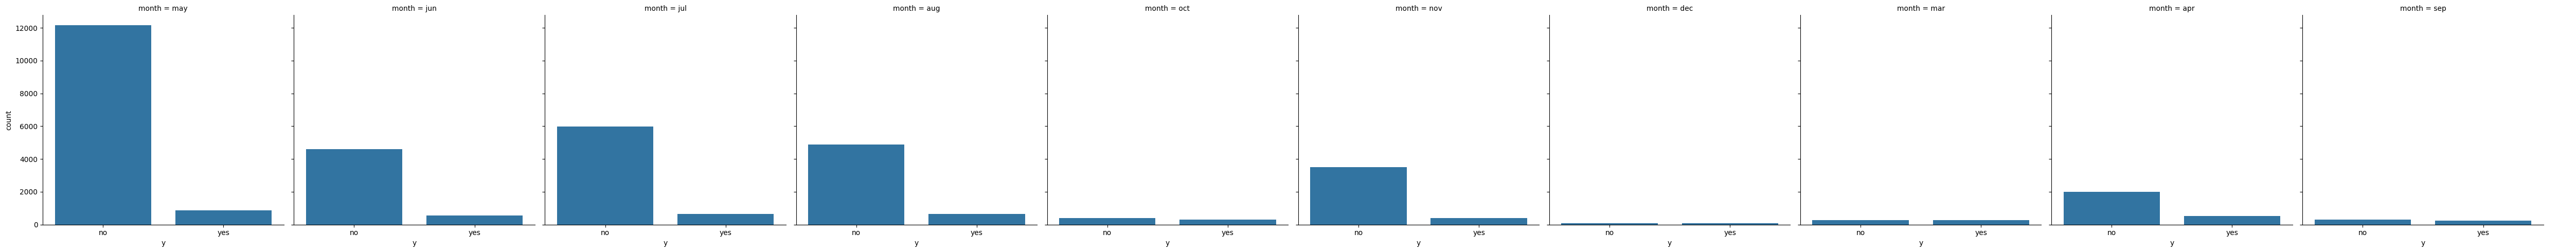

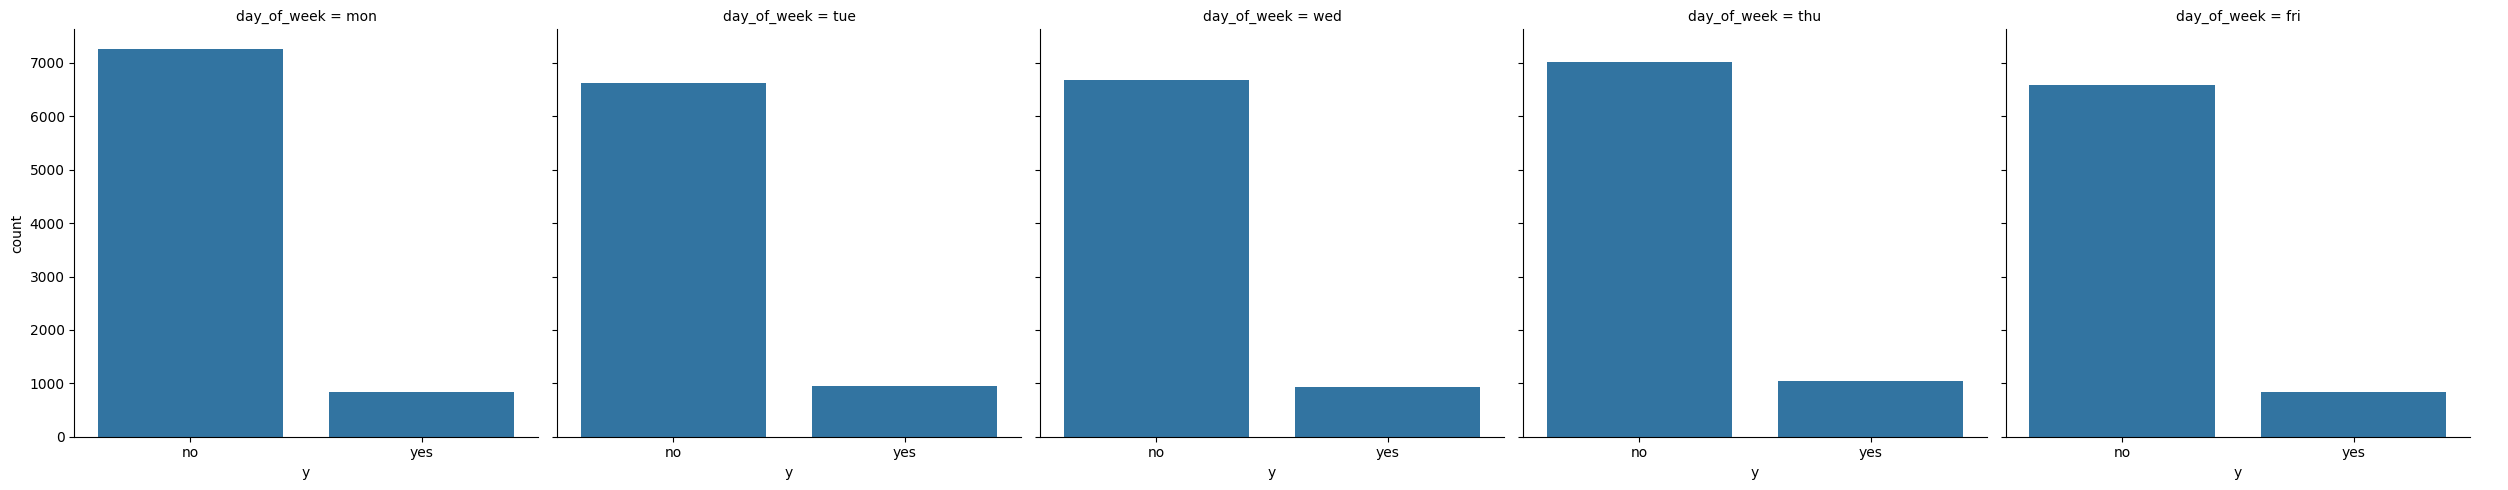

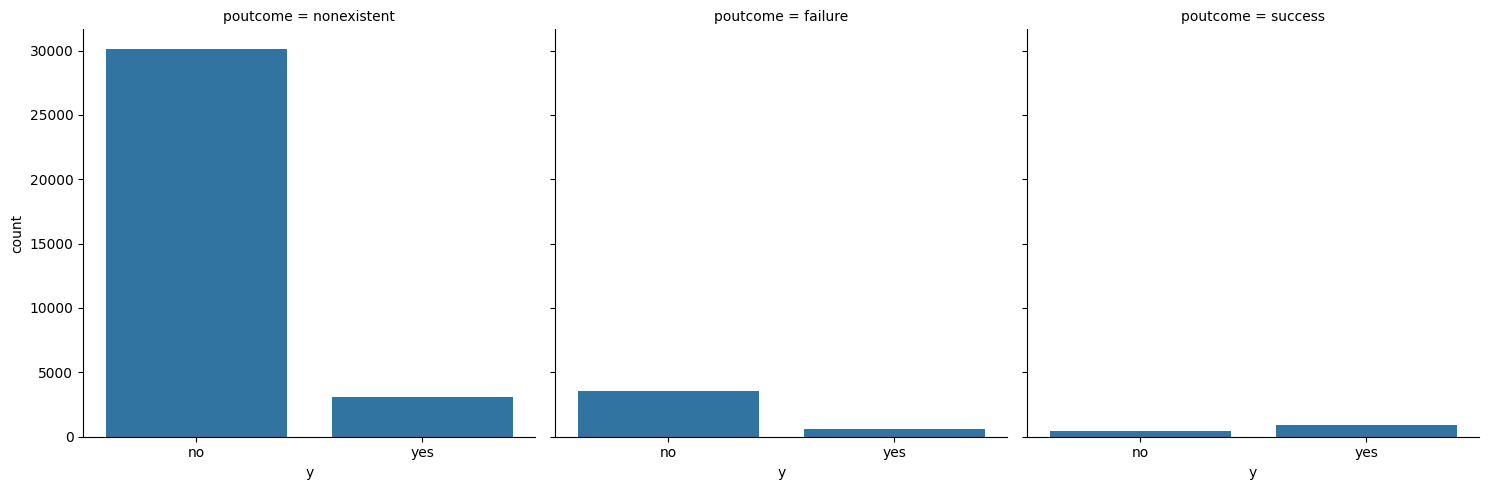

In [20]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in cat_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [21]:
#Check target label split over categorical features and find the count
for categorical_feature in cat_features:
    print(df.groupby(['y',categorical_feature]).size())
    print('------------------------------')

y    job          
no   admin.           8303
     blue-collar      8037
     entrepreneur     1282
     housemaid         916
     management       2471
     retired          1247
     self-employed    1231
     services         3430
     student           578
     technician       5547
     unemployed        849
     unknown           288
yes  admin.           1332
     blue-collar       632
     entrepreneur      121
     housemaid         106
     management        326
     retired           431
     self-employed     149
     services          322
     student           270
     technician        726
     unemployed        141
     unknown            36
dtype: int64
------------------------------
y    marital 
no   divorced     3964
     married     20944
     single       9204
     unknown        67
yes  divorced      472
     married      2513
     single       1595
     unknown        12
dtype: int64
------------------------------
y    education          
no   basic.4y         

**Observation**

- The retired client has high interest on deposit
- The client who has housing loan seems to be not interested much on deposit
- if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
- in month of March, September, October and December, client show high interest to deposit
- in month of may, records are high but client interst ratio is very less

#### Explore the Numerical Features

In [22]:
# list of numerical variables
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(num_features))

# visualise the numerical variables
df[num_features].head()

Number of numerical variables:  4


,age,campaign,pdays,previous
0,56,1,999,0
1,57,1,999,0
2,37,1,999,0
3,40,1,999,0
4,56,1,999,0


**Observation**

- There are 4 numerical features


#### Find Discrete Numerical Features

In [23]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


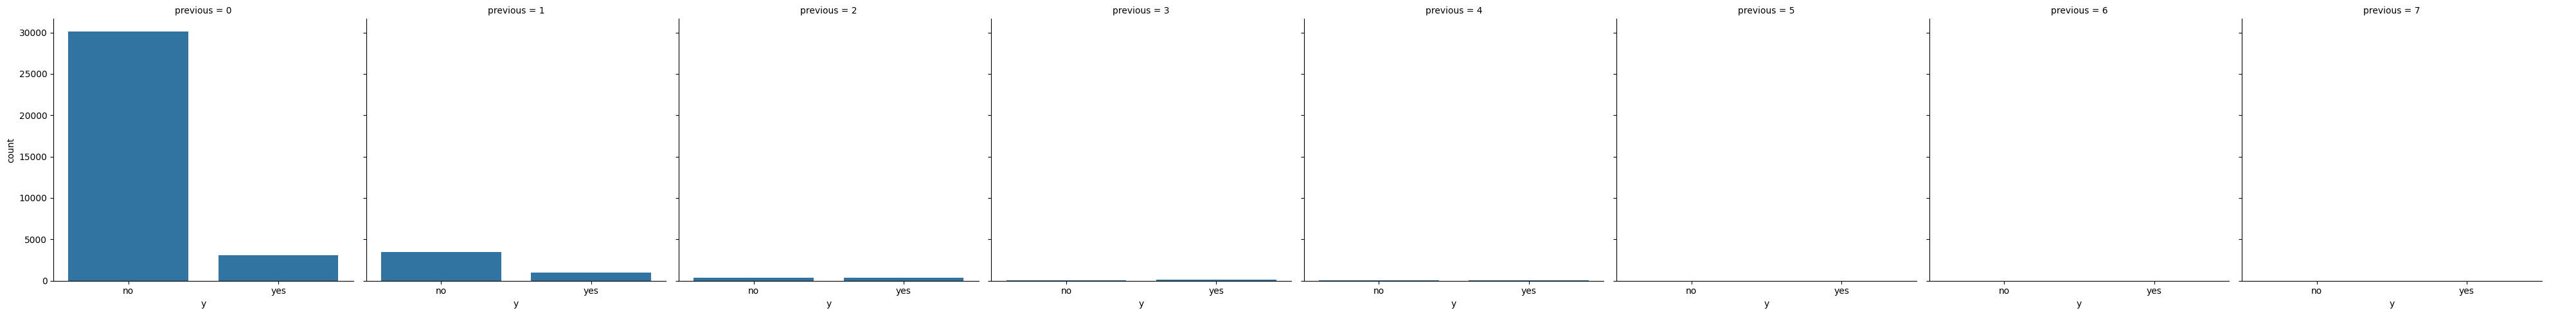

In [24]:
for numerical_feature in discrete_feature:
    sns.catplot(x='y', col=numerical_feature, kind='count', data= df)
plt.show()

####  Find Continous Numerical Features

In [25]:
continuous_features=[feature for feature in num_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


#### Distribution of Continous Numerical Features

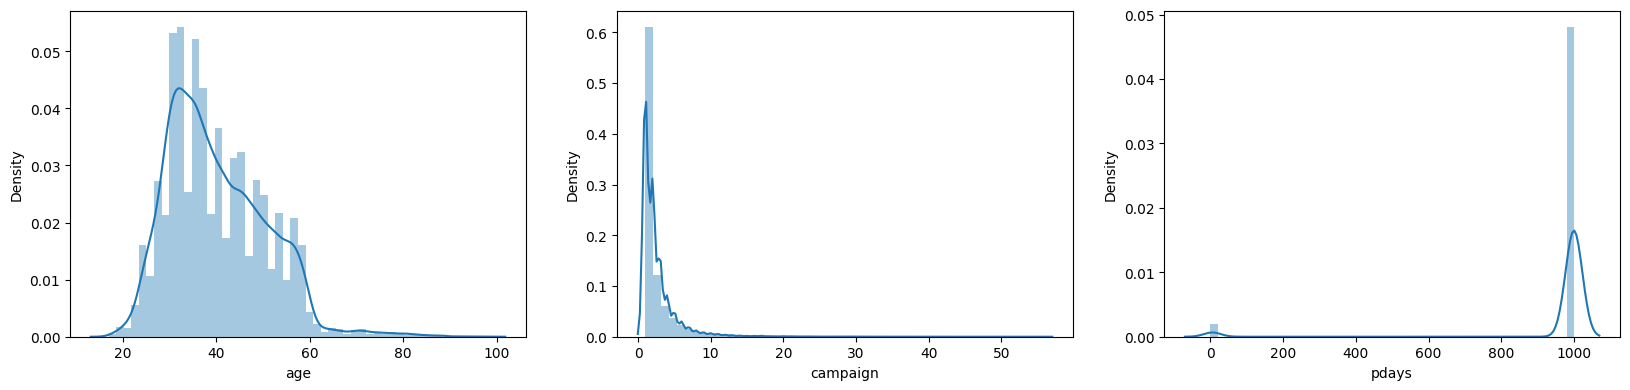

In [26]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Observation**

- It seems age, days distributed normally
- compaign and pdays heavely skewed towards left and seems to be have some outliers.

#### Relation between Continous numerical Features and Labels

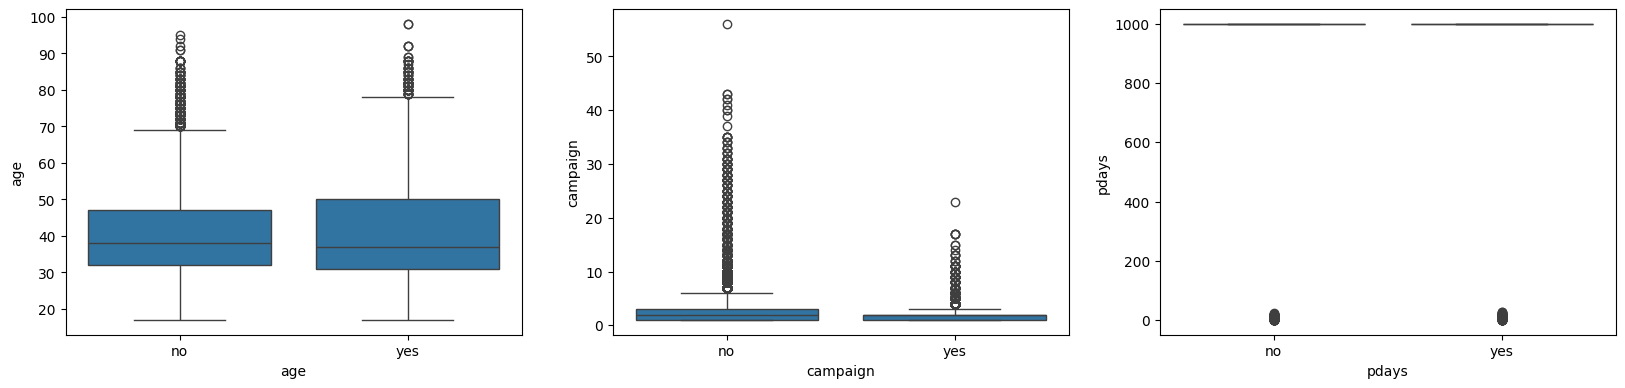

In [27]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

#### Find Outliers in numerical features

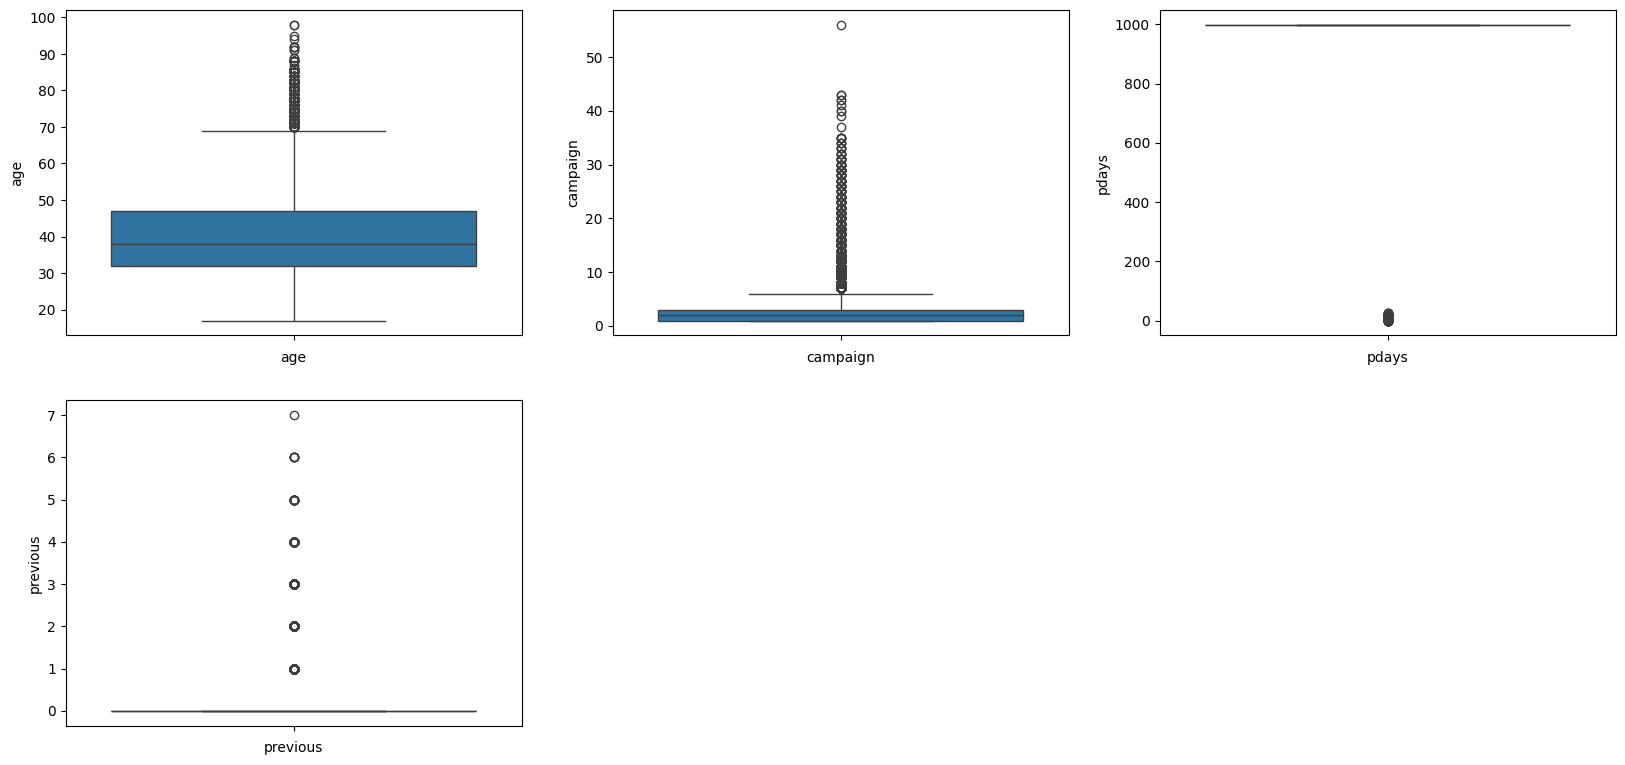

In [28]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**Observation**

- age, compaign, and pdays has some outliers


#### Explore the Correlation between numerical features

<Axes: >

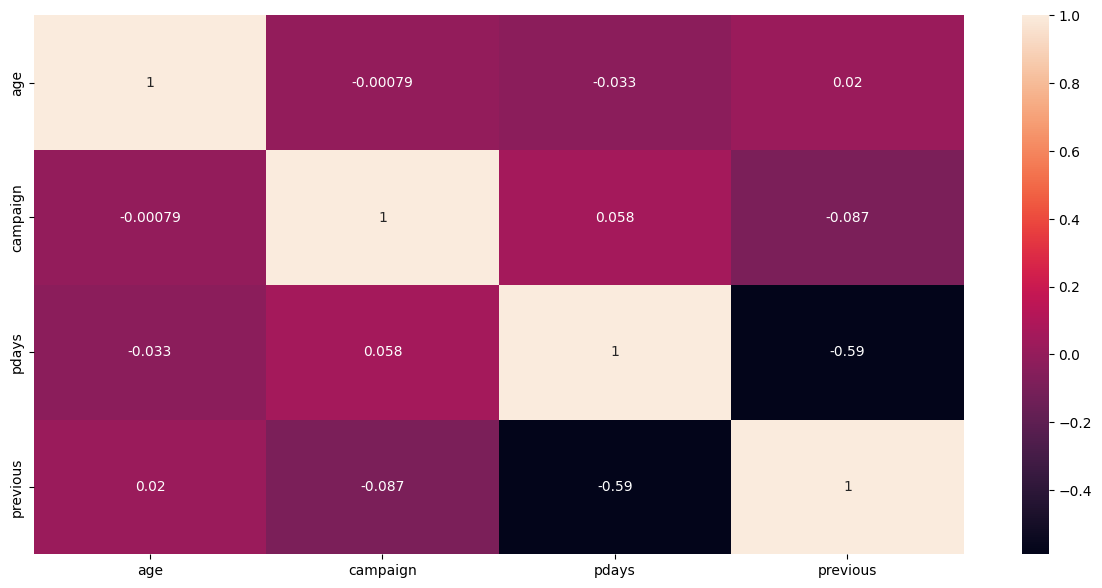

In [29]:
## Checking for correlation
num_df = df[num_features]
cor_mat = num_df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True)

- it seems no feature is heavily correlated with other features


#### Check the Data set is balanced or not based on target values in classification

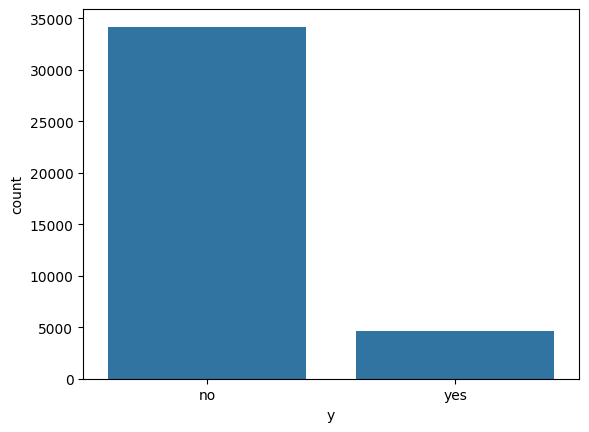

In [30]:
#total patient count based on cardio_results
sns.countplot(x='y',data=df)
plt.show()

In [31]:
df['y'].groupby(df['y']).count()


y
no     34179
yes     4592
Name: y, dtype: int64

- The given dataset appears to be imbalanced.





# Feature Engineering

In [32]:
df2=df.copy()

In [33]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,no


In [34]:
df2.shape

(38771, 15)

In [35]:
#defaut features does not play imp role
df2.groupby(['y','default']).size()

y    default
no   no         26439
     unknown     7737
     yes            3
yes  no          4151
     unknown      441
dtype: int64

In [36]:
df2.drop(['default'],axis=1, inplace=True)

In [37]:
df2.groupby(['y','pdays']).size()

y    pdays
no   0            5
     1           18
     2           24
     3          140
     4           55
     5           17
     6          123
     7           20
     8            6
     9           29
     10          22
     11          13
     12          32
     13           8
     14           9
     15           8
     16           5
     17           6
     18           3
     19           2
     20           1
     22           1
     999      33632
yes  0           10
     1            8
     2           37
     3          298
     4           63
     5           29
     6          289
     7           40
     8           12
     9           35
     10          30
     11          15
     12          26
     13          28
     14          11
     15          16
     16           6
     17           2
     18           4
     19           1
     21           2
     22           2
     25           1
     26           1
     27           1
     999       3625
dtype: in

In [38]:
# drop pdays as it has 999 value for around 80%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [39]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 17 to 98

age
17     5
18    28
19    41
20    64
21    98
      ..
91     2
92     4
94     1
95     1
98     2
Name: age, Length: 78, dtype: int64

In [40]:
# remove outliers in feature campaign...
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           13722
     2            8859
     3            4589
     4            2363
     5            1463
     6             898
     7             584
     8             382
     9             266
     10            212
     11            165
     12            122
     13             87
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            22

In [41]:
df3 = df2[df2['campaign'] < 33]

In [42]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           13722
     2            8859
     3            4589
     4            2363
     5            1463
     6             898
     7             584
     8             382
     9             266
     10            212
     11            165
     12            122
     13             87
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
yes  1            2264
     2            1201
     3             572
     4             249
     5             120
     6              75
     7              38
     8              17
     9              17
     10             12
     11             

In [43]:
# remove outliers in feature previous...
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           30119
     1            3508
     2             402
     3              88
     4              32
     5               5
     6               2
     7               1
yes  0            3095
     1             965
     2             350
     3             128
     4              38
     5              13
     6               3
Name: previous, dtype: int64

In [44]:
df4 = df3[df3['previous'] < 31]

### Encoding Categorical Variables


In [45]:
# One-hot encoding for categorical variables
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week' ,'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dtype='int', dummy_na=False)], axis=1)

In [46]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0) # Convert target to binary
    df4.drop(col, axis=1, inplace=True)

In [47]:
df4.head(10)

,age,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,housing_new,loan_new,y_new
0,56,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,57,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,37,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
3,40,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,56,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5,45,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
6,59,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7,41,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8,24,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
9,25,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0


# Split Dataset into Training set and Test set

Normalize numerical features to a standard scale.



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
# Standardize the numerical columns
scl = StandardScaler()
numerical_columns = ['age', 'campaign', 'previous']
df4[numerical_columns] = scl.fit_transform(df4[numerical_columns])
df4[numerical_columns] 


# Define features and target
X = df4.drop(['y_new'],axis=1) # 'y' is the target column
y = df4['y_new']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (30999, 42)
y_train shape (30999,)
X_test shape (7750, 42)
y_test shape (7750,)


# Data Visualisation

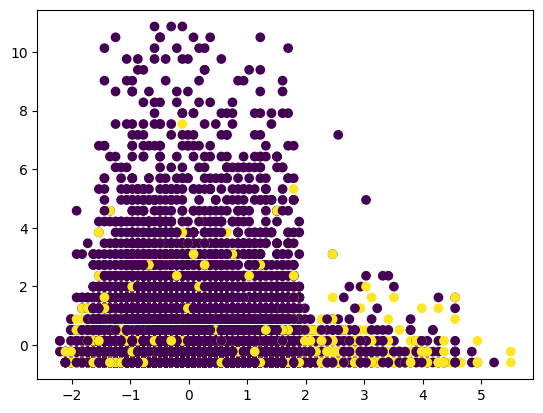

In [50]:
plt.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train)

In [66]:
# Create perfomance visualisation function
def visualize_predictions(X_test, y_test, y_preds):
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.scatter(X_test.values[:,0], X_test.values[:,1], c=y_test)
    plt.title('True Labels')
    
    plt.subplot(1,2,2)
    plt.scatter(X_test.values[:,0], X_test.values[:,1], c=y_preds)
    plt.title('Predicted Labels')

    plt.show()

# Building the Neural Network 
Create Binary classification model by using TensorFlow and Keras to build the neural network.

 

#### Importing TensorFlow and Keras


In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

#### Defining the Model ArchitectureImplementing Hyperparameter Tuning and Cross-Validation



In [53]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', dropout_rate=0.5):
   
    # Initialize the model
    model = Sequential()
    
    # Input layer and first hidden layer with L2 regularization
    model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001))) 
    model.add(Dropout(rate=dropout_rate)) # Dropout for regularization
    
    # Second hidden layer with L2 regularization
    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001))) 
    model.add(Dropout(rate=dropout_rate))
    
    # output layer
    model.add(Dense(units=1, activation='sigmoid')) 

    # Compile the model 
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [54]:
# Create KerasClassifier 
model = KerasClassifier(build_fn=create_model, verbose=1)

In [55]:
# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'dropout_rate': [0.3, 0.4, 0.5],
    'batch_size': [32, 64],
    'epochs': [50]
}

In [56]:
# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

In [57]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#### Training the Model
Train the model using the training data.



In [59]:
# Fit the grid search with early stopping
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
646/646 [==============================] - 11s 12ms/step - loss: 0.4115 - accuracy: 0.8765 - val_loss: 0.3384 - val_accuracy: 0.8946
Epoch 2/50
646/646 [==============================] - 3s 4ms/step - loss: 0.3505 - accuracy: 0.8895 - val_loss: 0.3176 - val_accuracy: 0.8979
Epoch 3/50
646/646 [==============================] - 2s 4ms/step - loss: 0.3359 - accuracy: 0.8910 - val_loss: 0.3099 - val_accuracy: 0.8982
Epoch 4/50
646/646 [==============================] - 2s 4ms/step - loss: 0.3300 - accuracy: 0.8906 - val_loss: 0.3062 - val_accuracy: 0.8979
Epoch 5/50
646/646 [==============================] - 2s 3ms/step - loss: 0.3255 - accuracy: 0.8908 - val_loss: 0.3025 - val_accuracy: 0.8983
Epoch 6/50
646/646 [==============================] - 3s 5ms/step - loss: 0.3217 - accuracy: 0.8909 - val_loss: 0.3034 - val_accuracy: 0.8982
Epoch 7/50
646/646 [==============================] - 3s 4ms/step - loss: 0.3198 - accuracy: 0.8912 - val_loss: 0.3010 - val_accuracy: 0.8959
Epoc

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



646/646 [==============================] - 5s 5ms/step - loss: 0.5213 - accuracy: 0.8657 - val_loss: 0.4339 - val_accuracy: 0.8879
Epoch 2/50
646/646 [==============================] - 3s 4ms/step - loss: 0.4646 - accuracy: 0.8796 - val_loss: 0.4217 - val_accuracy: 0.8877
Epoch 3/50
646/646 [==============================] - 2s 4ms/step - loss: 0.4510 - accuracy: 0.8797 - val_loss: 0.4126 - val_accuracy: 0.8879
Epoch 4/50
646/646 [==============================] - 2s 4ms/step - loss: 0.4450 - accuracy: 0.8801 - val_loss: 0.4078 - val_accuracy: 0.8880
Epoch 5/50
646/646 [==============================] - 2s 4ms/step - loss: 0.4381 - accuracy: 0.8802 - val_loss: 0.4038 - val_accuracy: 0.8880
Epoch 6/50
646/646 [==============================] - 2s 3ms/step - loss: 0.4311 - accuracy: 0.8806 - val_loss: 0.4004 - val_accuracy: 0.8879
Epoch 7/50
646/646 [==============================] - 2s 3ms/step - loss: 0.4267 - accuracy: 0.8808 - val_loss: 0.3956 - val_accuracy: 0.8877
Epoch 8/50
646/64

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [60]:
# Summarize the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.891504148642222 using {'batch_size': 64, 'dropout_rate': 0.4, 'epochs': 50, 'optimizer': 'adam'}


In [61]:
# Display the architecture of the best model
grid_result.best_estimator_.model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 64)                2752      
                                                                 
 dropout_108 (Dropout)       (None, 64)                0         
                                                                 
 dense_163 (Dense)           (None, 32)                2080      
                                                                 
 dropout_109 (Dropout)       (None, 32)                0         
                                                                 
 dense_164 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


#### Evaluating the Model
Evaluate the model's performance on the test data.



In [62]:
# Evaluate the model
test_loss, test_accuracy = grid_result.best_estimator_.model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

243/243 [==============================] - 2s 7ms/step - loss: 0.2936 - accuracy: 0.8988
Test Loss: 0.29
Test Accuracy: 0.90


In [64]:
# Get predictions for the test set
y_pred = grid_result.best_estimator_.model.predict(X_test)
y_preds = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

243/243 [==============================] - 1s 6ms/step


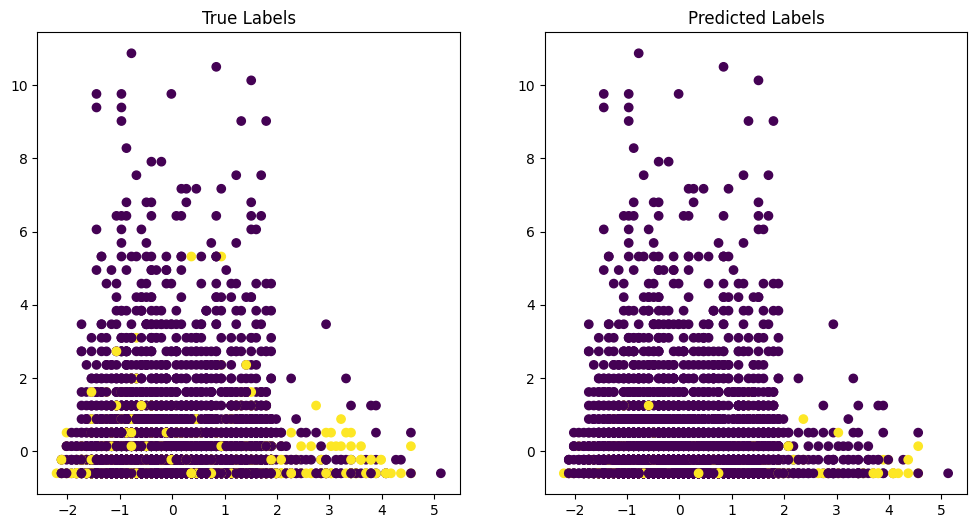

In [67]:
# Visualize predictions
visualize_predictions(X_test, y_test, y_preds)

#### Extract the best parameters and refit the model to capture the history:


In [77]:
# Extract the best parameters
best_params = grid_result.best_params_
best_params

{'batch_size': 64, 'dropout_rate': 0.4, 'epochs': 50, 'optimizer': 'adam'}

In [78]:
# Create the model with the best parameters
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])

In [79]:
# Compile the model
best_model.compile(optimizer=best_params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
# Fit the model again with the best parameters and capture the history
history = best_model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'], 
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
485/485 [==============================] - 11s 13ms/step - loss: 0.4389 - accuracy: 0.8630 - val_loss: 0.3370 - val_accuracy: 0.8934
Epoch 2/50
485/485 [==============================] - 5s 11ms/step - loss: 0.3606 - accuracy: 0.8866 - val_loss: 0.3175 - val_accuracy: 0.8964
Epoch 3/50
485/485 [==============================] - 3s 6ms/step - loss: 0.3423 - accuracy: 0.8882 - val_loss: 0.3088 - val_accuracy: 0.8982
Epoch 4/50
485/485 [==============================] - 2s 4ms/step - loss: 0.3366 - accuracy: 0.8885 - val_loss: 0.3075 - val_accuracy: 0.8975
Epoch 5/50
485/485 [==============================] - 2s 4ms/step - loss: 0.3293 - accuracy: 0.8889 - val_loss: 0.3033 - val_accuracy: 0.8981
Epoch 6/50
485/485 [==============================] - 2s 4ms/step - loss: 0.3261 - accuracy: 0.8891 - val_loss: 0.3014 - val_accuracy: 0.8969
Epoch 7/50
485/485 [==============================] - 2s 5ms/step - loss: 0.3239 - accuracy: 0.8908 - val_loss: 0.2986 - val_accuracy: 0.8972
Epo

#### Analyzing the Results
Plot the training history to visualize the model's performance over epochs.



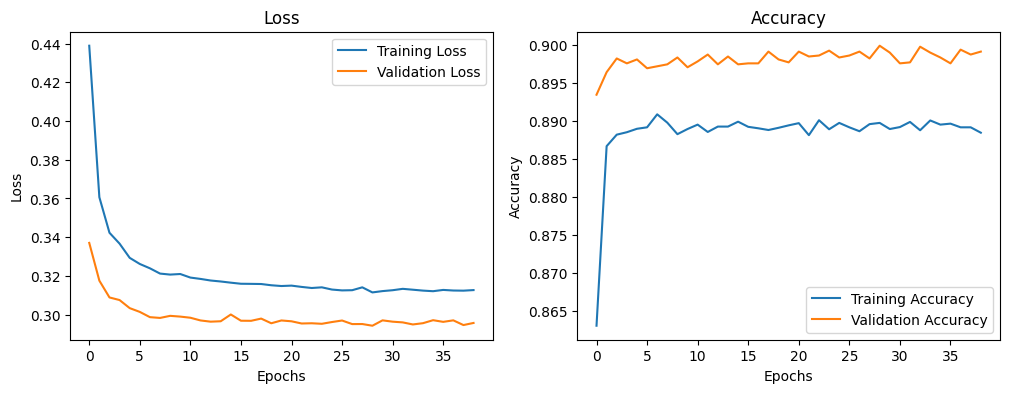

In [82]:
# Plotting the training history
plt.figure(figsize=(12, 4))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Observation**

The picture shows two plots: one for loss and one for accuracy over 39 epochs of training after implementing some changes to the model.


**1- Left Plot: Loss**

- Title: "Loss"

- Y-axis: Loss (a measure of how well the model's predictions match the true values;  lower is better)

- X-axis: Epochs (number of training iterations)

Blue Line (Training Loss): This line represents the loss on the training data. It starts high and decreases over the epochs, indicating that the model is learning and improving its performance on the training data.

Orange Line (Validation Loss): This line represents the loss on the validation data. It also starts high and decreases over time but generally remains lower than the training loss. This is a positive sign that the model is generalizing well to unseen data.


**2- Right Plot: Accuracy**

- Title: "Accuracy"

- Y-axis: Accuracy (a measure of the proportion of correct predictions; higher is better)

- X-axis: Epochs (number of training iterations)

Blue Line (Training Accuracy): This line represents the accuracy on the training data. It starts lower and increases over the epochs, indicating that the model is learning and making more correct predictions on the training data.

Orange Line (Validation Accuracy): This line represents the accuracy on the validation data. It starts high and remains relatively stable with slight fluctuations, indicating consistent performance on unseen data.ata.

### Interpretation:

- Training Loss and Accuracy: The training loss decreases, and the training accuracy increases over time, suggesting that the model is effectively learning the training data.

- Validation Loss and Accuracy: The validation loss decreases and stabilizes at a low level, and the validation accuracy remains high and stable. This indicates that the model is not overfitting and is performing well on the validation set.

- Convergence: Both loss and accuracy curves show signs of convergence, where they stabilize after several epochs, indicating that the model's performance is leveling off and further training might not significantly improve the results.